<a href="https://colab.research.google.com/github/r0cketr1kky/COVID-19_X-Ray/blob/master/ScoreCAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scam-net-rewintous

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [3]:
%tensorflow_version 1.x

import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

TensorFlow 1.x selected.


Using TensorFlow backend.


In [4]:
train_datagen = ImageDataGenerator(rescale=1/255,
  rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	horizontal_flip=True,
	fill_mode="nearest")
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/gdrive/My Drive/dataset',  
        target_size=(224,224),
        batch_size=32,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        '/gdrive/My Drive/Validation',  
        target_size=(224,224), 
        batch_size=16,
        class_mode='categorical')


Found 44 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [5]:
import tensorflow as tf
gpu_options = tf.GPUOptions(allow_growth=True)
session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64 ,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))
print(model.summary())
input_shape = (224, 224)
conv_layers = model.layers[-8].output
softmax_output = model.layers[-1].output

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
______________________________________

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=24,  
      epochs=10,
      validation_data = validation_generator)


Epoch 1/10
24/24 [==============================] - 30s 1s/step - loss: 0.7121 - accuracy: 0.5038 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/10
24/24 [==============================] - 23s 961ms/step - loss: 0.6925 - accuracy: 0.5133 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
24/24 [==============================] - 23s 967ms/step - loss: 0.6941 - accuracy: 0.4886 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
24/24 [==============================] - 23s 965ms/step - loss: 0.6931 - accuracy: 0.5152 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
24/24 [==============================] - 23s 975ms/step - loss: 0.6927 - accuracy: 0.5133 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
24/24 [==============================] - 23s 957ms/step - loss: 0.6942 - accuracy: 0.4678 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
24/24 [==============================] - 24s 981ms/step - loss: 0.6936 - accuracy: 0.4754 - val_loss: 0.6932 - val_accuracy: 0.5000
E

In [0]:
from keras_applications.vgg16 import preprocess_input
from keras_preprocessing.image import load_img, img_to_array

source_img = load_img('/gdrive/My Drive/covid-chestxray-dataset/images/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day3.jpg', target_size=input_shape)
img = img_to_array(source_img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img, backend=keras.backend)

In [0]:
from scam.keras import ScoreCAM
scoreCAM = ScoreCAM(model_input=model.input, last_conv_output=conv_layers, softmax_output=softmax_output, input_shape=input_shape)
scoreCAM.prepare_cam(img)

In [0]:
import matplotlib.pyplot as plt


def draw_original_and_heatmap(class_id):
    heatmap = scoreCAM.get_class_heatmap(class_id)
    f = plt.figure(figsize=(8,8))
    left = f.add_subplot(131)
    left.set_title("Original image")
    left.axis('off')
    left.imshow(source_img)
    
    right = f.add_subplot(132)    
    right.set_title("Heatmap for class {}".format(class_id))
    right.axis('off')
    right.imshow(heatmap, cmap='plasma')
    
    merged = f.add_subplot(133)    
    merged.set_title("Overlay for class {}".format(class_id))
    merged.axis('off')
    merged.imshow(source_img, alpha=0.5)
    merged.imshow(heatmap, cmap='plasma', alpha=0.5)

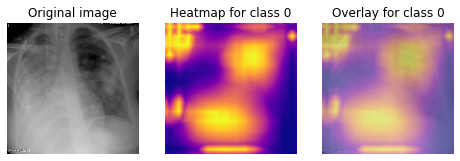

In [15]:
draw_original_and_heatmap(0)

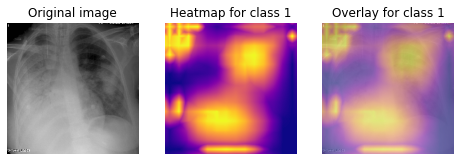

In [16]:
draw_original_and_heatmap(1)